In [11]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l

In [2]:
num_train, num_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((num_train+num_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)# cat做拼接，1是按横向操作
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + 
               true_w[2] * poly_features[:, 2] + true_b )
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [3]:
features[:2], poly_features[:2], labels[:2]

(tensor([[ 1.0046],
         [-0.4194]]),
 tensor([[ 1.0046,  1.0092,  1.0138],
         [-0.4194,  0.1759, -0.0738]]),
 tensor([8.4594, 3.4931]))

In [4]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)    

In [5]:
num_epochs, loss = 100, torch.nn.MSELoss()

In [6]:
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01) 
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1)) 
            optimizer.zero_grad() 
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1) 
        test_labels = test_labels.view(-1, 1) 
        train_ls.append(loss(net(train_features),
        train_labels).item()) 
        test_ls.append(loss(net(test_features),
        test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss',
test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
range(1, num_epochs + 1), test_ls, ['train', 'test']) 
    print('weight:', net.weight.data,'\nbias:', net.bias.data)

final epoch: train loss 9.509894152870402e-05 test loss 0.0001115290287998505
weight: tensor([[ 1.2020, -3.4006,  5.6002]]) 
bias: tensor([4.9998])


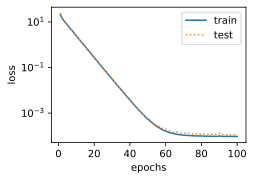

In [7]:
fit_and_plot(poly_features[:num_train, :], poly_features[num_train:, :], labels[:num_train], labels[num_train:])

final epoch: train loss 0.1713302880525589 test loss 174.41336059570312
weight: tensor([[1.2202, 1.9758, 1.9818]]) 
bias: tensor([3.2183])


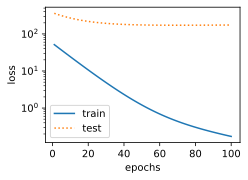

In [10]:
fit_and_plot(poly_features[0:2, :], poly_features[num_train:, :], labels[0:2],
labels[num_train:]) # 过拟合

In [85]:
def dropout(X, drop_prob):
    X = X.float()
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob

    if keep_prob == 0:
        return torch.zeros_like(X)
    mask = np.random.binomial(n=1, p=keep_prob, size=X.shape)# (torch.rand(X.shape) < keep_prob).float() 
                                                             # 不是很能理解上面注释里的这种方法,应该是一种近似替代
                                                             # 效果与二项分布函数相当   
    return torch.from_numpy(mask) * X / keep_prob

In [96]:
X = torch.arange(16).view(2, 8)
dropout(X, 0.5)

tensor([[ 0.,  2.,  4.,  0.,  8.,  0., 12., 14.],
        [ 0., 18.,  0.,  0.,  0.,  0., 28.,  0.]])

In [138]:
t = torch.rand(X.shape)
print(t)

tensor([[0.5926, 0.5110, 0.5338, 0.9986, 0.8828, 0.4192, 0.8042, 0.7434],
        [0.2959, 0.7865, 0.1387, 0.7338, 0.8714, 0.3346, 0.2989, 0.4816]])


In [139]:
(t < 0.8).float()

tensor([[1., 1., 1., 0., 0., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1.]])

In [144]:
np.random.binomial(n=1, p=0.8, size=X.shape)

array([[1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0]])